In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
import scipy.ndimage
import numpy as np
from helper import *

Urban2 = "../data/all-frames-colour/Urban2/"
Grove3 = "../data/all-frames-colour/Grove3/"
RubberWhale = "../data/all-frames-colour/RubberWhale/"

In [ ]:
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

In [ ]:
def harris_corner_detector(img,threshold,k=0.04,input_type='color'):
    img0= np.copy(img)
    if input_type=='color':
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    offset =2
    # compute the x and y gradients
    y_grad, x_grad = np.gradient(img)
    # m is height n is width of Image
    m,n = img.shape
    r_arr = np.zeros((m,n))
    # x is horizontal y is vertical
    for i in range(offset,m-offset):
        for j in range(offset,n-offset):
            I_x = x_grad[i-offset:i+offset+1,j-offset:j+offset+1]
            I_y = y_grad[i-offset:i+offset+1,j-offset:j+offset+1]
            #[[Ix^2,Ix*Iy][Ix*Iy,Iy^2]]
            sIxx = np.sum(I_x**2)
            sIyy = np.sum(I_y**2)
            sIxy = np.sum(I_x*I_y) 
            det = sIxx*sIyy - sIxy**2
            trace = sIxx + sIyy
            R = det - k*(trace**2)
            if R > threshold:
                r_arr[i][j] = R
    corners=[]
    # for non maximal separation
    offset = 10
    for i in range(offset,m-offset):
        for j in range(offset,n-offset):
            if r_arr[i][j] !=0:
                if r_arr[i][j] == np.amax(r_arr[i-offset:i+offset+1,j-offset:j+offset+1]):
                    cv2.circle(img0,(j,i),3,(255,0,0),-1)
                    corners.append([i,j])
    
    return corners,img0
    


In [161]:

def shitomasi_corner_detector(img,threshold,showimage=True,input_type='color'):
    img0 = np.copy(img)
    if input_type=='color':
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    offset =2
    # compute the x and y gradients
    y_grad, x_grad = np.gradient(img)
    m,n = img.shape
    # x is horizontal y is vertical
    r_arr = np.zeros((m,n))
    for i in range(offset,m-offset):
        for j in range(offset,n-offset):
            I_x = x_grad[i-offset:i+offset+1,j-offset:j+offset+1]
            I_y = y_grad[i-offset:i+offset+1,j-offset:j+offset+1]
            #[[Ix^2,Ix*Iy][Ix*Iy,Iy^2]]
            sIxx = np.sum(I_x**2)
            sIyy = np.sum(I_y**2)
            sIxy = np.sum(I_x*I_y) 
            mat= np.array([[sIxx,sIxy],[sIxy,sIyy]])
            w ,v = np.linalg.eig(mat)
            R = min(w)

            if R > threshold :
                r_arr[i][j] =R


    corners=[]
    # for non maximal separation
    offset = 10
    for i in range(offset,m-offset):
        for j in range(offset,n-offset):
            if r_arr[i][j] !=0:
                if r_arr[i][j] == np.amax(r_arr[i-offset:i+offset+1,j-offset:j+offset+1]):
                    cv2.circle(img0,(j,i),3,(255,0,0),-1)
                    corners.append([i,j])
    return corners,img0

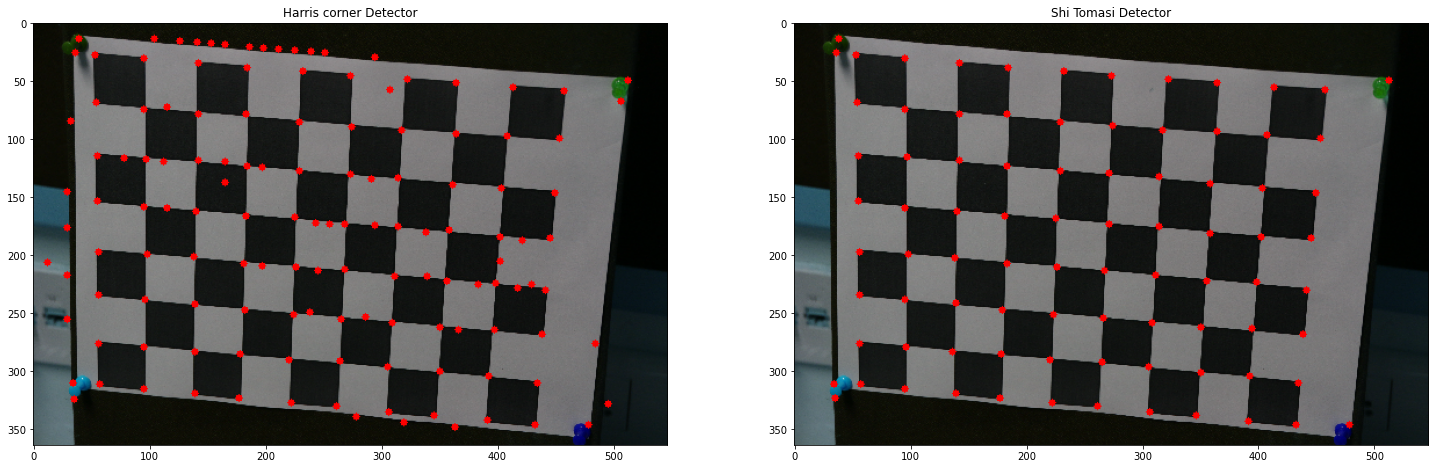

In [162]:
data_path = "../data/corner_detection_examples/"
img = cv2.imread(data_path+'checkerboard.jpg')
img = cv2.resize(img,(547,364))
corners_haris,img_haris = harris_corner_detector(img,40000,0.06)
corners_shi,img_shi =  shitomasi_corner_detector(img,10000)



plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Harris corner Detector")
plt.imshow(img_haris)
plt.subplot(122)
corners_shitomas=shitomasi_corner_detector(img,10000)
plt.title("Shi Tomasi Detector")
plt.imshow(img_shi) 

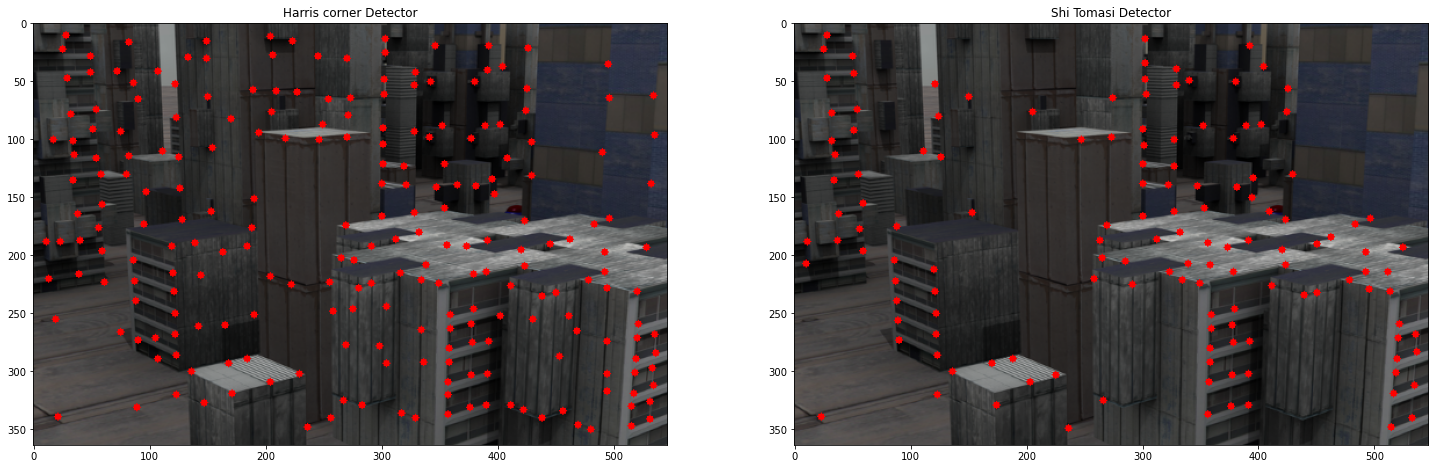

In [164]:
data_path = Urban2+"frame07.png"
img = cv2.imread(data_path)
img = cv2.resize(img,(547,364))
corners_haris,img_haris = harris_corner_detector(img,40000,0.06)
corners_shi,img_shi =  shitomasi_corner_detector(img,1000)


plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Harris corner Detector")
plt.imshow(img_haris)
plt.subplot(122)
plt.title("Shi Tomasi Detector")
plt.imshow(img_shi) 

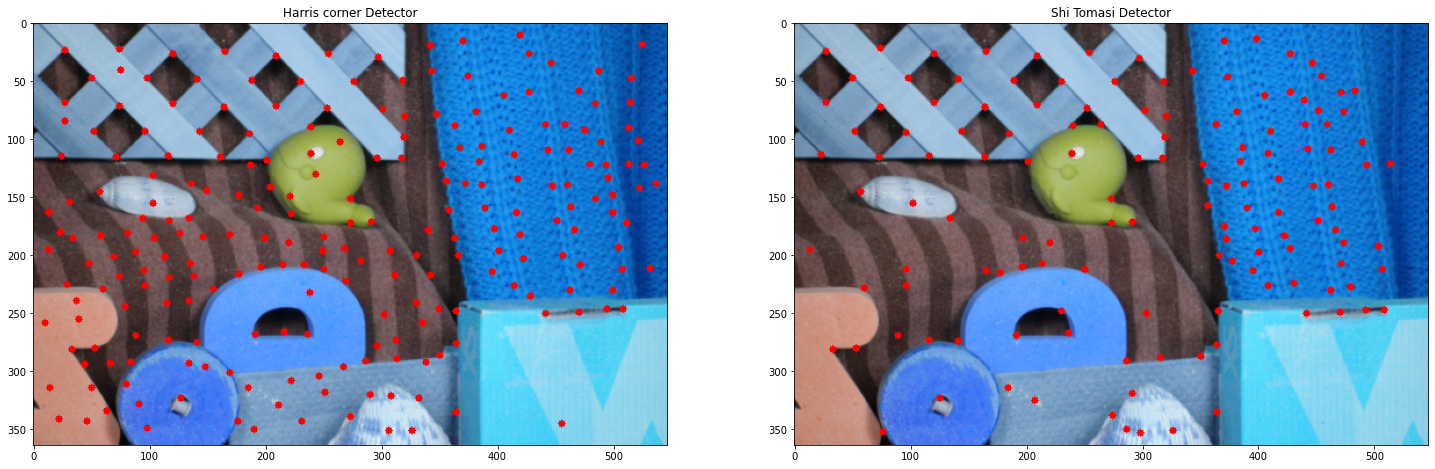

In [166]:
data_path = RubberWhale+"frame07.png"
img = cv2.imread(data_path)
img = cv2.resize(img,(547,364))
corners_haris,img_haris = harris_corner_detector(img,40000,0.06)
corners_shi,img_shi =  shitomasi_corner_detector(img,1000)


plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Harris corner Detector")
plt.imshow(img_haris)
plt.subplot(122)
plt.title("Shi Tomasi Detector")
plt.imshow(img_shi) 

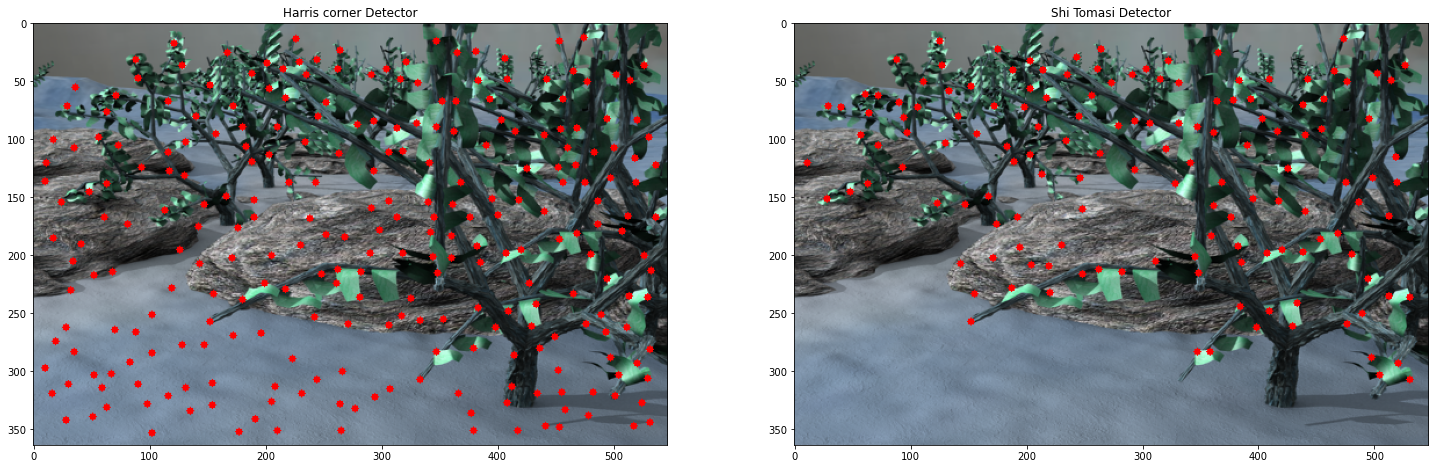

In [167]:
data_path = Grove3+"frame07.png"
img = cv2.imread(data_path)
img = cv2.resize(img,(547,364))
corners_haris,img_haris = harris_corner_detector(img,40000,0.06)
corners_shi,img_shi =  shitomasi_corner_detector(img,10000)


plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Harris corner Detector")
plt.imshow(img_haris)
plt.subplot(122)
corners_shitomas=shitomasi_corner_detector(img,10000)
plt.title("Shi Tomasi Detector")
plt.imshow(img_shi) 

In [168]:
def vis_optic_flow_arrows(img, flow, show=True):
    """
    Visualize optical flow on image
    """

    x = np.arange(0, img.shape[1], 1)
    y = np.arange(0, img.shape[0], 1)
    x, y = np.meshgrid(x, y)
    u ,v = flow[:,:,0],flow[:,:,1]
    plt.figure(figsize=(10,10))
    fig = plt.imshow(img, cmap="gray", interpolation="bicubic")

    plt.axis("off")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    step = img.shape[0] // 10


    plt.quiver(
        x[::step, ::step],
        y[::step, ::step],
        u[::step, ::step],
        v[::step, ::step],
        color="r",
        pivot="middle",
        headwidth=2,
        headlength=3,
    )
    if show:
        plt.show()

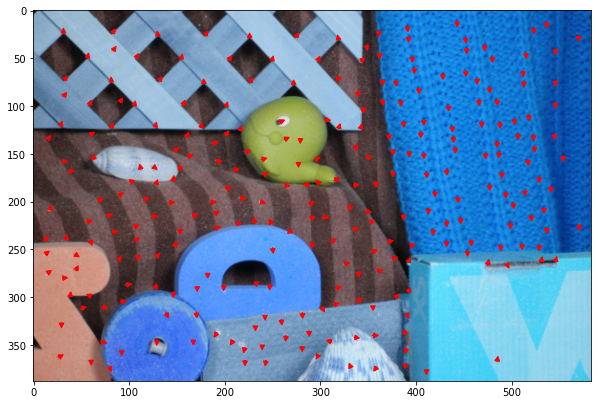

In [174]:
def LukasKanadeForwardAdditive(img1, img2, windowSize,tau=0.01,mode="corners",input_type='color'):
    x_offset = windowSize[0]//2
    y_offset = windowSize[1] //2
    Img1 = img1.copy()
    Img2 = img2.copy()
    if input_type=='color':
        Img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        Img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    Img1 = Img1/255
    Img2 = Img2/255
    m,n = Img1.shape
    # m is height n is width of Image
    """ kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]]) 
    mode1 = 'same'
    dx = sig.convolve2d(Img1, kernel_x, boundary='symm', mode=mode1)
    dy = sig.convolve2d(Img1, kernel_y, boundary='symm', mode=mode1)
    dt = sig.convolve2d(Img2, kernel_t, boundary='symm', mode=mode1) + sig.convolve2d(Img1, -kernel_t, boundary='symm', mode=mode1)"""
    kernel_x = np.array([[-1, 1]])
    kernel_y = np.array([[-1], [1]])
    kernel_t = np.array([[1]])
    dx = scipy.ndimage.convolve(input=Img1, weights=kernel_x, mode="nearest")
    dy = scipy.ndimage.convolve(input=Img1, weights=kernel_y, mode="nearest")
    dt = scipy.ndimage.convolve(input=Img1, weights=kernel_t, mode="nearest") + scipy.ndimage.convolve(
        input=Img2, weights=-kernel_t, mode="nearest"
    )     
    """ dy,dx =np.gradient(Img1)
    dt = Img1 - Img2 """
    
    flow = np.zeros((m,n,2))
    indices_list=[]
    corners=[]
    if mode == "corners":
        corners,_ = harris_corner_detector(img1,30000,0.06,input_type=input_type)
        for c in corners:
            i = c[0]
            j = c[1]
            indices_list.append([i,j])
        
    else:
        for i in range(x_offset,m-x_offset):
            for j in range(y_offset,n-y_offset):
                indices_list.append([i,j])
    # print("Size of corners",len(corners))
    
    for i,j in indices_list:
        if  i<x_offset or i>=m-x_offset or j<y_offset or j>=n-y_offset:
            continue
        Ix = dx[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        Iy = dy[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        It = dt[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        # ATA = [[IxIx , IxIy],[IyIx,IyIy]] ATb = [IxIt,IyIt] 
        ATA = np.array([[np.sum(Ix*Ix),np.sum(Ix*Iy)],[np.sum(Iy*Ix),np.sum(Iy*Iy)]])
        ATb = np.array([np.sum(Ix*It),np.sum(Iy*It)])
        eigenvals , eigenvecs = np.linalg.eig(ATA)
        if min(eigenvals) < tau:
            continue
        invATA = np.linalg.pinv(ATA)
        u,v = np.dot(invATA,ATb)
        flow[i,j,0] = u
        flow[i,j,1] = v
    if mode == "corners":
        return corners,flow
    else:
        corners = []
        return corners,flow


def VisualizeFlow(img,corners,flow,savefilename=None):
    a=[]
    b=[]
    u=[]
    v=[]
    for c in corners:
        a.append(c[0])
        b.append(c[1])
        u.append(flow[c[0]][c[1]][0])
        v.append(flow[c[0]][c[1]] [1])
    plt.figure(figsize=(10,10))
    #plt.quiver(b,a,v,u,head_width = 5, head_length = 5)
    plt.imshow(img)
    for c in corners:
        m=c[0]
        n=c[1]

        #if abs(u[m,n])>t or abs(v[m,n])>t: # setting the threshold to plot the vectors
        plt.arrow(n,m,flow[m,n,1],flow[m,n,0],head_width = 5, head_length = 5, color = "r")
    if savefilename!=None:
        plt.savefig(savefilename)
    

img1 = cv2.imread(RubberWhale+'frame10.png')
img2 = cv2.imread(RubberWhale+'frame11.png')
corners,flow = LukasKanadeForwardAdditive(img1,img2,(5,5),mode="corners",input_type='color')
VisualizeFlow(img1,corners,flow)

In [183]:
import glob
import regex as re
""" 
f_names = ["07","08","09","10","11","12","13","14"]
for i in range(len(f_names)-1):
    img1 = cv2.imread(RubberWhale+'frame'+f_names[i]+'.png')
    img2 = cv2.imread(RubberWhale+'frame'+f_names[i+1]+'.png')
    corners,flow = LukasKanadeForwardAdditive(img1,img2,(5,5),mode="corners",input_type='color')
    VisualizeFlow(img1,corners,flow,savefilename="./video/frame"+f_names[i]+".png") """

""" frames_arr=[]
frames = glob.glob('./video/*.png')
for file in frames:
    img = cv2.imread(file)
    frames_arr.append(img)

h , w, l = frames_arr[0].shape

framerate =3
fourcc =cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('outvideo_1.mp4',fourcc,framerate,(w,h))

for img in frames_arr:
    video.write(img)

cv2.destroyAllWindows()
video.release() """


In [186]:
img1 = cv2.imread(Urban2+'frame10.png')
img2 = cv2.imread(Urban2+'frame11.png')


corners,flow = LukasKanadeForwardAdditive(img1,img2,(5,5),mode="all")

In [187]:
flow_g = read_flow("../data/ground-truth-flow/Urban2/flow10.flo")
epe = np.mean(np.sqrt(np.square(flow_g[:,:,0] - flow[:,:,0]) + np.square(flow_g[:,:,1] - flow[:,:,1])))
print("EPE for flow10 image is ",epe)

EPE for flow10 image is  8.447463107364484


In [194]:
def OpticalFlowRefine(Img1,Img2,windowSize,u0,v0):
    u0 = u0.astype(int)
    v0 = v0.astype(int)
    m,n = Img1.shape
    Img1_mod  = Img1.copy()
    for i in range(Img1.shape[0]):
        for j in range(Img1.shape[1]):
            if 0<= i+u0[i,j] and i+ u0[i,j] < m and 0<= j+v0[i,j] and j+v0[i,j] < n:
                Img1_mod[i+u0[i,j],j+v0[i,j]] = Img1[i,j]
    Img1 = Img1_mod.copy()
    x_offset = windowSize[0]//2
    y_offset = windowSize[1] //2
    # m is height n is width of Image
    """ kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])

    mode1 = 'same'
    dx = sig.convolve2d(Img1, kernel_x, boundary='symm', mode=mode1)
    dy = sig.convolve2d(Img1, kernel_y, boundary='symm', mode=mode1)
    dt = sig.convolve2d(Img2, kernel_t, boundary='symm', mode=mode1) + sig.convolve2d(Img1, -kernel_t, boundary='symm', mode=mode1) """
         
    """ dy,dx =np.gradient(Img1)
    dt = Img1 - Img2 """

    kernel_x = np.array([[-1, 1]])
    kernel_y = np.array([[-1], [1]])
    kernel_t = np.array([[1]])
    dx = scipy.ndimage.convolve(input=Img1, weights=kernel_x, mode="nearest")
    dy = scipy.ndimage.convolve(input=Img1, weights=kernel_y, mode="nearest")
    dt = scipy.ndimage.convolve(input=Img1, weights=kernel_t, mode="nearest") + scipy.ndimage.convolve(
        input=Img2, weights=-kernel_t, mode="nearest"
    ) 


    
    window_sz = 5
    offset = window_sz//2
    flow = np.zeros((m,n,2))
    indices_list=[]
    
    for i in range(offset,m-offset):
        for j in range(offset,n-offset):
            indices_list.append([i,j])
    # print("Size of corners",len(corners))
    
    for i,j in indices_list:
        if  i<y_offset or i>=m-y_offset or j<x_offset or j>=n-x_offset:
            continue
        Ix = dx[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        Iy = dy[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        It = dt[i-x_offset:i+x_offset+1,j-y_offset:j+y_offset+1]
        # ATA = [[IxIx , IxIy],[IyIx,IyIy]] ATb = [IxIt,IyIt] 
        ATA = np.array([[np.sum(Ix*Ix),np.sum(Ix*Iy)],[np.sum(Iy*Ix),np.sum(Iy*Iy)]])
        ATb = np.array([np.sum(Ix*It),np.sum(Iy*It)])
        eigenvals , eigenvecs = np.linalg.eig(ATA)
        tau = 0.01
        if min(eigenvals) < tau:
            continue
        invATA = np.linalg.pinv(ATA)
        u,v = np.dot(invATA,ATb)
        flow[i,j,0] = u+u0[i,j]
        flow[i,j,1] = v +v0[i,j] 
    return flow


def downsample(img,factor):
    for i in range(factor):
        rows,cols = img.shape
        img = cv2.pyrDown(img,dstsize=(cols//2,rows//2))
    return img

def MultiScaleLucasKanade(Img1,Img2,windowSize,numLevels):
    
    rows,cols= Img1.shape

    Img1_down  = downsample(Img1,numLevels-1)
    Img2_down = downsample(Img2,numLevels-1)
    _,flow_prev =  LukasKanadeForwardAdditive(Img1_down,Img2_down,windowSize,input_type="gray",mode="all")

    for i in range(numLevels-1,0,-1):
        Img1_down  = downsample(Img1,i-1)
        Img2_down = downsample(Img2,i-1)
        rows,cols= Img1_down.shape
    
        temp0 = cv2.pyrUp(flow_prev[:,:,0]*2, dstsize = (cols, rows))
        temp1 = cv2.pyrUp(flow_prev[:,:,1]*2, dstsize = (cols , rows))
        
        flow_cur = OpticalFlowRefine(Img1_down,Img2_down,windowSize,temp0,temp1)
        flow_prev =flow_cur

    return flow_prev

img1 = cv2.imread(RubberWhale+"frame10.png")
img2 = cv2.imread(RubberWhale +"frame11.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
flow_multiscale = MultiScaleLucasKanade(img1,img2,(5,5),4)


In [189]:
cr,flow_normal = LukasKanadeForwardAdditive(img1,img2,(5,5),input_type="gray",mode="all")

In [195]:
flow_g = read_flow("../data/ground-truth-flow/RubberWhale/flow10.flo")
(a,b,c) = flow_g.shape
for i in range(a):
    for j in range(b):
        for k in range(c):
            if flow_g[i,j,k] >=1000:
                flow_g[i,j,k]=0
                flow_multiscale[i,j,k]=0
flow = flow_normal
epe = np.mean(np.sqrt(np.square(flow_g[:,:,0] - flow[:,:,0]) + np.square(flow_g[:,:,1] - flow[:,:,1])))
print("EPE for flow10 image is ",epe)

flow = flow_multiscale
epe = np.mean(np.sqrt(np.square(flow_g[:,:,0] - flow[:,:,0]) + np.square(flow_g[:,:,1] - flow[:,:,1])))

print("EPE for flow10 image is ",epe)

EPE for flow10 image is  1.4561954662846899
EPE for flow10 image is  1.3531080817717376
